### Libraries
Loading necessary libraries

In [2]:
# Numpy
import numpy as np
# MATPLOTlib.pyplot
import matplotlib.pyplot as plt
# netCDF
import netCDF4
# Savitzky-Golay filter from the Scipy library
from scipy.signal import savgol_filter

### Question 2: Read in variables

In [5]:
# Dataset
UWKA_Data = netCDF4.Dataset('atsc5010_Lab1.nc')

# Liquid water content from the cloud droplet probe
LWC_CDP = UWKA_Data.variables['LWC_CDP'][:] # [g/m^3]

# Liquid water content from the particle volume monitor probe
LWC_PVM = UWKA_Data.variables['LWC_PVM'][:] # [g/m^3]

# Droplet number concentration from the cloud droplet probe
N_CDP = UWKA_Data.variables['N_CDP'][:] # [#/m^3]

# Droplet number concentration from the forward scattering spectrometer probe
N_FSSP = UWKA_Data.variables['N_FSSP'][:] # [#/m^3]

# Vertical wind speed
W_Wind = UWKA_Data.variables['WWIND'][:] # m/s

### Question 3: Buidling two arrays to represent the distance from the center of the cloud

In [7]:
# Creating variable for the 10 Hz data
Dist_10Hz = np.linspace(-5, 5, 1001)

# Creating bariable for the 25 Hz data
Dist_25Hz = np.linspace(-5, 5, 2501)

### Questions 5 through 20: Plots 1, 2, and 3

In [9]:
# Smooth vertical wind speed
W_Wind_smooth = savgol_filter(W_Wind, 25, 1)

# Finding where the smoothed vertical wind is greater than or equal to 12 m/s
W_Wind_smooth_12 = W_Wind_smooth.copy()
W_Wind_smooth_12[W_Wind_smooth <= 12] = np.nan

# Creating array for the zero line
Zero = np.zeros(Dist_25Hz.size)

Text(0.5, 0, 'Distnace from Center of Cloud (km)')

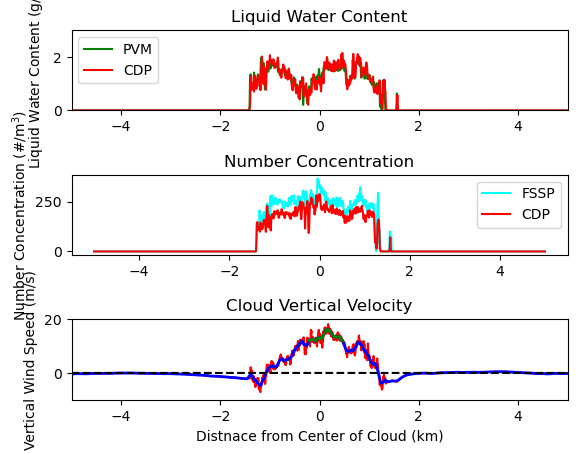

In [15]:
# Creating the plotting window
fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.subplots_adjust(hspace = 0.8)

# Plot 1
ax1.plot(Dist_10Hz, LWC_PVM, color = 'green', label = 'PVM')
ax1.plot(Dist_10Hz, LWC_CDP, color = 'red', label = 'CDP')
ax1.set_xlim([-5., 5.])
ax1.set_ylim([0., 3.])
ax1.legend(loc = 'upper left')
ax1.set(ylabel = 'Liquid Water Content (g/m$^3$)')
ax1.set_title('Liquid Water Content')

# Plot 2
ax2.plot(Dist_10Hz, N_FSSP, color = 'cyan', label = 'FSSP')
ax2.plot(Dist_10Hz, N_CDP, color = 'red', label = 'CDP')
ax1.set_xlim(-5., 5.)
ax2.legend(loc = 'upper right')
ax2.set(ylabel = 'Number Concentration (#/m$^3$)')
ax2.set_title('Number Concentration')

# Plot 3
ax3.plot(Dist_25Hz, W_Wind, color = 'red')
ax3.plot(Dist_25Hz, W_Wind_smooth, color = 'blue', linewidth = 2)
ax3.plot(Dist_25Hz, W_Wind_smooth_12, color = 'green', linewidth = 2)
ax3.plot(Dist_25Hz, Zero, '--', color = 'black')
ax3.set_xlim([-5., 5.])
ax3.set_ylim([-10., 20.])
ax3.set(ylabel = 'Vertical Wind Speed (m/s)')
ax3.set_title('Cloud Vertical Velocity')
plt.xlabel('Distnace from Center of Cloud (km)')

### Questions 21 through 29: Plot 4

In [22]:
# Find where LWC is greater than 0.02
LWC_index = np.logical_and(LWC_CDP > 0.02, LWC_PVM > 0.02)

# Creating the one-to-one line
X_ones = np.linspace(0, 2.5)
Y_ones = np.linspace(0, 2.5)

# Calculating the best fit line
LWC_fit = np.polyfit(LWC_CDP[LWC_index], LWC_PVM[LWC_index], 1)

# X coordinates associated with the best fit line
X_fit = np.linspace(0, 2.5)

# Calculating the y-axis coordinates of the best fit line
Y_fit = X_fit * LWC_fit[0] + LWC_fit[1]

# Computing the correlation coefficient
LWC_rho = np.corrcoef(LWC_CDP[LWC_index], LWC_PVM[LWC_index])

Text(0.5, 1.0, 'LWC Probe Comparision')

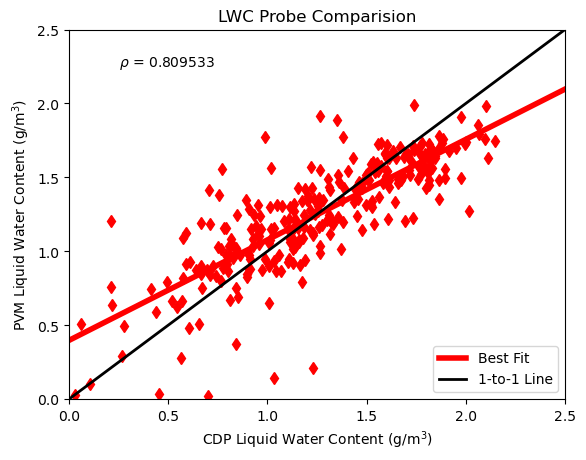

In [21]:
# Plot 4
plt.plot(LWC_CDP[LWC_index], LWC_PVM[LWC_index], 'rd')
plt.plot(X_fit, Y_fit, color = 'red', linewidth = 4, label = 'Best Fit')
plt.plot(X_ones, Y_ones, color = 'black', linewidth = 2, label = '1-to-1 Line')
plt.xlim(0., 2.5)
plt.ylim(0., 2.5)
plt.text(0.25, 2.25, r'$\rho$ = ' +str(round(LWC_rho[0, 1], 6)))
plt.legend(loc = 'lower right')
plt.xlabel('CDP Liquid Water Content (g/m$^3$)')
plt.ylabel('PVM Liquid Water Content (g/m$^3$)')
plt.title('LWC Probe Comparision')

### Question 30: Plot 5

In [23]:
# Find where number concentration is greater than 1
N_index = np.logical_and(N_FSSP > 1, N_CDP > 1)

# Creating the one-to-one line
X_ones_N = np.linspace(0, 400)
Y_ones_N = np.linspace(0, 400)
# Calculating the best fit line
N_fit = np.polyfit(N_FSSP[N_index], N_CDP[N_index], 1)

# X-coordinates associated with the best fit line
X_fit_N = np.linspace(0, 400)

# Calculating the y-axis corrdinates of the best fit line
Y_fit_N = X_fit_N * N_fit[0] + N_fit[1]

# Computing the correlation coefficient
N_rho = np.corrcoef(N_FSSP[N_index], N_CDP[N_index])

Text(0.5, 1.0, 'Number Concentration Probe Comparision')

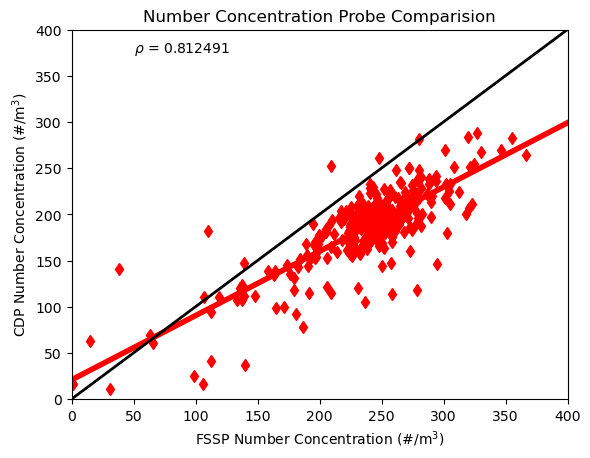

In [24]:
# Plot 5
plt.plot(N_FSSP[N_index], N_CDP[N_index], 'rd')
plt.plot(X_fit_N, Y_fit_N, color = 'red', linewidth = 4, label = 'Best Fit')
plt.plot(X_ones_N, Y_ones_N, color = 'black', linewidth = 2, label = '1-to-1 Line')
plt.text(50, 375, r'$\rho$ = ' +str(round(N_rho[0, 1], 6)))
plt.xlim([0., 400.])
plt.ylim([0., 400.])
plt.xlabel('FSSP Number Concentration (#/m$^3$)')
plt.ylabel('CDP Number Concentration (#/m$^3$)')
plt.title('Number Concentration Probe Comparision')